In [26]:
import numpy as np
import pandas as pd

In [27]:
# 데이터 불러오기

test = pd.read_csv("/content/drive/MyDrive/fake-news/test.csv")
train = pd.read_csv("/content/drive/MyDrive/fake-news/train.csv")
submit = pd.read_csv("/content/drive/MyDrive/fake-news/submit.csv")

test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [28]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [29]:
submit.head()

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1


In [30]:
train.text[0:1]

0    House Dem Aide: We Didn’t Even See Comey’s Let...
Name: text, dtype: object

In [31]:
for i in range(5):
  print(f'{i+1}번째 기사')
  print(train.text[i])
  

1번째 기사
House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) 
With apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. 
As we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing 

In [32]:
print(train.shape)
print(test.shape)

(20800, 5)
(5200, 4)


In [33]:
train[train['label']==1]

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
...,...,...,...,...,...
20788,20788,Maine’s Gov. LePage Threatens To ‘Investigate’...,Joe Clark,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
20791,20791,Lawyer Who Kept Hillary Campaign Chief Out of ...,Daniel Greenfield,Lawyer Who Kept Hillary Campaign Chief Out of ...,1
20793,20793,Idiot Who Destroyed Trump Hollywood Star Gets ...,Robert Rich,Share This \nAlthough the vandal who thought i...,1
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [34]:
train[train['label']==0]

,id,title,author,text,label
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
...,...,...,...,...,...
20792,20792,"Jakarta Bombing Kills Three Police Officers, L...",John Hayward,Two suicide bombers attacked a bus station in ...,0
20794,20794,Trump: Putin ’Very Smart’ to Not Retaliate ove...,Lee Stranahan,Donald Trump took to Twitter Friday to praise ...,0
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0


In [35]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [36]:
test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [37]:
# 비어 있는 곳은 다 빈칸으로 남겨두기.

train = train.fillna('')
test = test.fillna('')

### Stemming:
- Stemming은 linguistic normalisation 하는 과정이다. 
- 어근만 남기게 되어, 같은 어근을 가지고 있다면 동일한 언어로 취급할 수 있게 한다.



In [38]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [39]:
# 불용어를 먼저 다운로드 받아 보자. 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
print(stopwords.words('english'))
print(len(stopwords.words('english')), "개의 불용어가 있음.")

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [41]:
port_stem = PorterStemmer()

In [42]:
def stemming(content):
    review = re.sub('[^a-zA-Z]',' ',content)
    review = review.lower()
    review = review.split()
    review = [port_stem.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review

In [43]:
train['content'] = train['author']+' '+train['title']

In [44]:
print(train['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [45]:
X = train.drop('label',axis=1)
X
Y = train['label']

In [46]:
Y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [47]:
Y.value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [48]:
train['content'] = train['content'].apply(stemming)
print(train['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [50]:
print(train['content'][0])

darrel lucu hous dem aid even see comey letter jason chaffetz tweet


In [57]:
X = train['content'].values
Y = train['label'].values
X


array(['darrel lucu hous dem aid even see comey letter jason chaffetz tweet',
       'daniel j flynn flynn hillari clinton big woman campu breitbart',
       'consortiumnew com truth might get fire', ...,
       'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time',
       'alex ansari nato russia hold parallel exercis balkan',
       'david swanson keep f aliv'], dtype=object)

### TF-IDF
- Term Frequency - Inverse Document Frequency
- 모든 문서에 자주 등장하는 단어는 중요도가 낮다.
- 특정 문서에서 자주 등장하는 단어는 중요도가 높다.


In [58]:
#수치화가 필요함.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer= TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [59]:
print(X)
print(Y)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)

# stratify 는 classification을 다룰 때 매우 중요함. stratify를 target으로 지정해주면
# 각각의 class 비율을 train/validation에 유지해줍니다.


In [61]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [62]:
from sklearn.metrics import accuracy_score

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print(training_data_accuracy)

0.9865985576923076


In [66]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(test_data_accuracy)

0.9790865384615385


In [68]:
# Confusion matrix 그려보기

import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [69]:
X__train, X__test,Y__train,Y__test = train_test_split(X,Y,test_size=0.33, random_state=42)

### classification model : Multinomial naive bayes

- NLP에서 많이 사용하는 모델이다.
- TF를 사용한다.
- 자세한 내용은 따로 정리하자!



In [70]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

accuracy : 0.95
Confusion matrix, without normalization


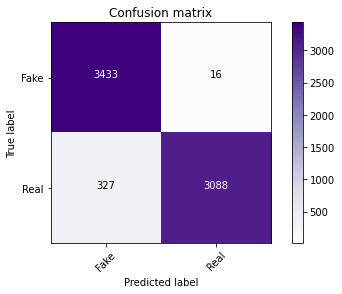

In [73]:
from sklearn import metrics
import itertools

classifier.fit(X__train, Y__train)
prediction__ = classifier.predict(X__test)
score = metrics.accuracy_score(Y__test,prediction__)
print(f'accuracy : {round(score,3)}')
cm1 = metrics.confusion_matrix(Y__test, prediction__)
plot_confusion_matrix(cm1, classes=['Fake','Real'])

### classification model : passive aggressive classifier

- online learning 의 한 방법.

In [74]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, test_size=0.33, random_state=42)

accuracy:   0.990
Confusion matrix, without normalization


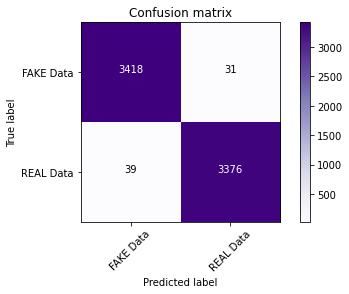

In [75]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

linear_clf.fit(X2_train, Y2_train)
prediction2 = linear_clf.predict(X2_test)
score = metrics.accuracy_score(Y2_test, prediction2)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(Y2_test, prediction2)
plot_confusion_matrix(cm2, classes=['FAKE Data', 'REAL Data'])

###  Buildling a predictive system



In [79]:
# Logistic Regression

X_new = X_test[0]

prediction = model.predict(X_new)
print(prediction)

if(prediction[0] ==0):
  print('The news is Real')
else:
  print('The news is fuckin\' Fake')



[1]
The news is fuckin' Fake


In [80]:
# multinomial naive bayes
X1_new = X__test[0]

prediction = model.predict(X1_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is fuckin\' Fake')


[1]
The news is fuckin' Fake


In [81]:
# passive aggressive classifier

X2_new = X2_test[0]

prediction = model.predict(X2_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [89]:
# report

# show the prediction, recall, F1 Score ,,,

from sklearn.metrics import classification_report
print("Logistic Regression report")
print(classification_report(Y_test,X_test_prediction))
print("="*60)
print("Multinomial NB report")
print(classification_report(Y__test,prediction__))
print("="*60)
print("Passive Aggressive report")
print(classification_report(Y2_test,prediction2))
print("="*60)

Logistic Regression report
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2077
           1       0.97      0.99      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160

Multinomial NB report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3449
           1       0.99      0.90      0.95      3415

    accuracy                           0.95      6864
   macro avg       0.95      0.95      0.95      6864
weighted avg       0.95      0.95      0.95      6864

Passive Aggressive report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3449
           1       0.99      0.99      0.99      3415

    accuracy                           0.99      6864
   macro avg       0.99      0.99      0.99      6864

Passive Aggressive model 이 가장 정확도가 높게 나왔다.